# Parcellation

Goal: Compare different parcellations

## Setup

In [1]:
# Import modules and R
import numpy as np, pandas as pd
from plotnine import *
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

In [61]:
# Import local code
import sys
sys.path.append('../code')
from pcaVersion import *
from gradientVersion import *
from processing_helpers import *
from analysis_helpers import *
from brainspan import *
%R source("../code/Rplots.R");
%R source("../code/brainPlots.R");

## Compare HCP projected to DK

In [91]:
dm_hcp_ds9 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_ds9')
dm_hcp_ds8 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_ds8')
dm_hcp_3d_ds5 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_3donors_ds5')
dm_dk_ds8 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('dk_ds8')
pca_dk_ds9 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('dk_ds9')

New gradients version: method=dm, params={'alpha': 1}, kernel=normalized_angle, sparsity=0, data=hcp_ds9
New gradients version: method=dm, params={'alpha': 1}, kernel=normalized_angle, sparsity=0, data=hcp_ds8
New gradients version: method=dm, params={'alpha': 1}, kernel=normalized_angle, sparsity=0, data=hcp_3donors_ds5
New gradients version: method=dm, params={'alpha': 1}, kernel=normalized_angle, sparsity=0, data=dk_ds9
New gradients version: method=dm, params={'alpha': 1}, kernel=normalized_angle, sparsity=0, data=dk_ds9


In [95]:
dm_dk_ds8 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('dk_ds8')

New gradients version: method=dm, params={'alpha': 1}, kernel=normalized_angle, sparsity=0, data=dk_ds8


In [44]:
dk_scores_dict = {
    'DM DK DS9': dm_dk_ds9.clean_scores(),
    'PCA DK DS9': pca_dk_ds9.clean_scores(),
    'DM HCP DS9 \n-> DK (weights)': dm_dk_ds9.score_from(dm_hcp_ds9),
    'DM HCP DS9 \n-> DK (vertices)': dm_hcp_ds9.score_in_dk(),
    'DM HCP 3+ DS5 \n-> DK (weights)': dm_dk_ds9.score_from(dm_hcp_3d_ds5),
    'DM HCP 3+ DS5 \n-> DK (vertices)': dm_hcp_3d_ds5.score_in_dk()
}

dk_scores = (pd.concat(dk_scores_dict)
             .reset_index(0)
             .rename({'level_0':'version'}, axis=1)
            )

In [45]:
def correlate_score_versions(scores_dict, base, plot=True):
    corrs_dict = {}
    for name, version in scores_dict.items():
        X = scores_dict[base].drop('label', axis=1)
        Y = version.drop('label', axis=1)
        corrs_dict[base + ' v ' + name] = correlate(X, Y)

    if plot:
        score_corrs = (pd.concat(corrs_dict)
         .melt(ignore_index=False)
         .reset_index()
         .set_axis(['version','x','y','corr'], axis=1)
        )
        return score_corrs
    else:
        return corrs_dict

In [47]:
score_corrs = correlate_score_versions(dk_scores_dict, base='DM HCP 3+ DS5 \n-> DK (vertices)')
score_corrs_2 = correlate_score_versions(dk_scores_dict, base='DM HCP DS9 \n-> DK (vertices)')

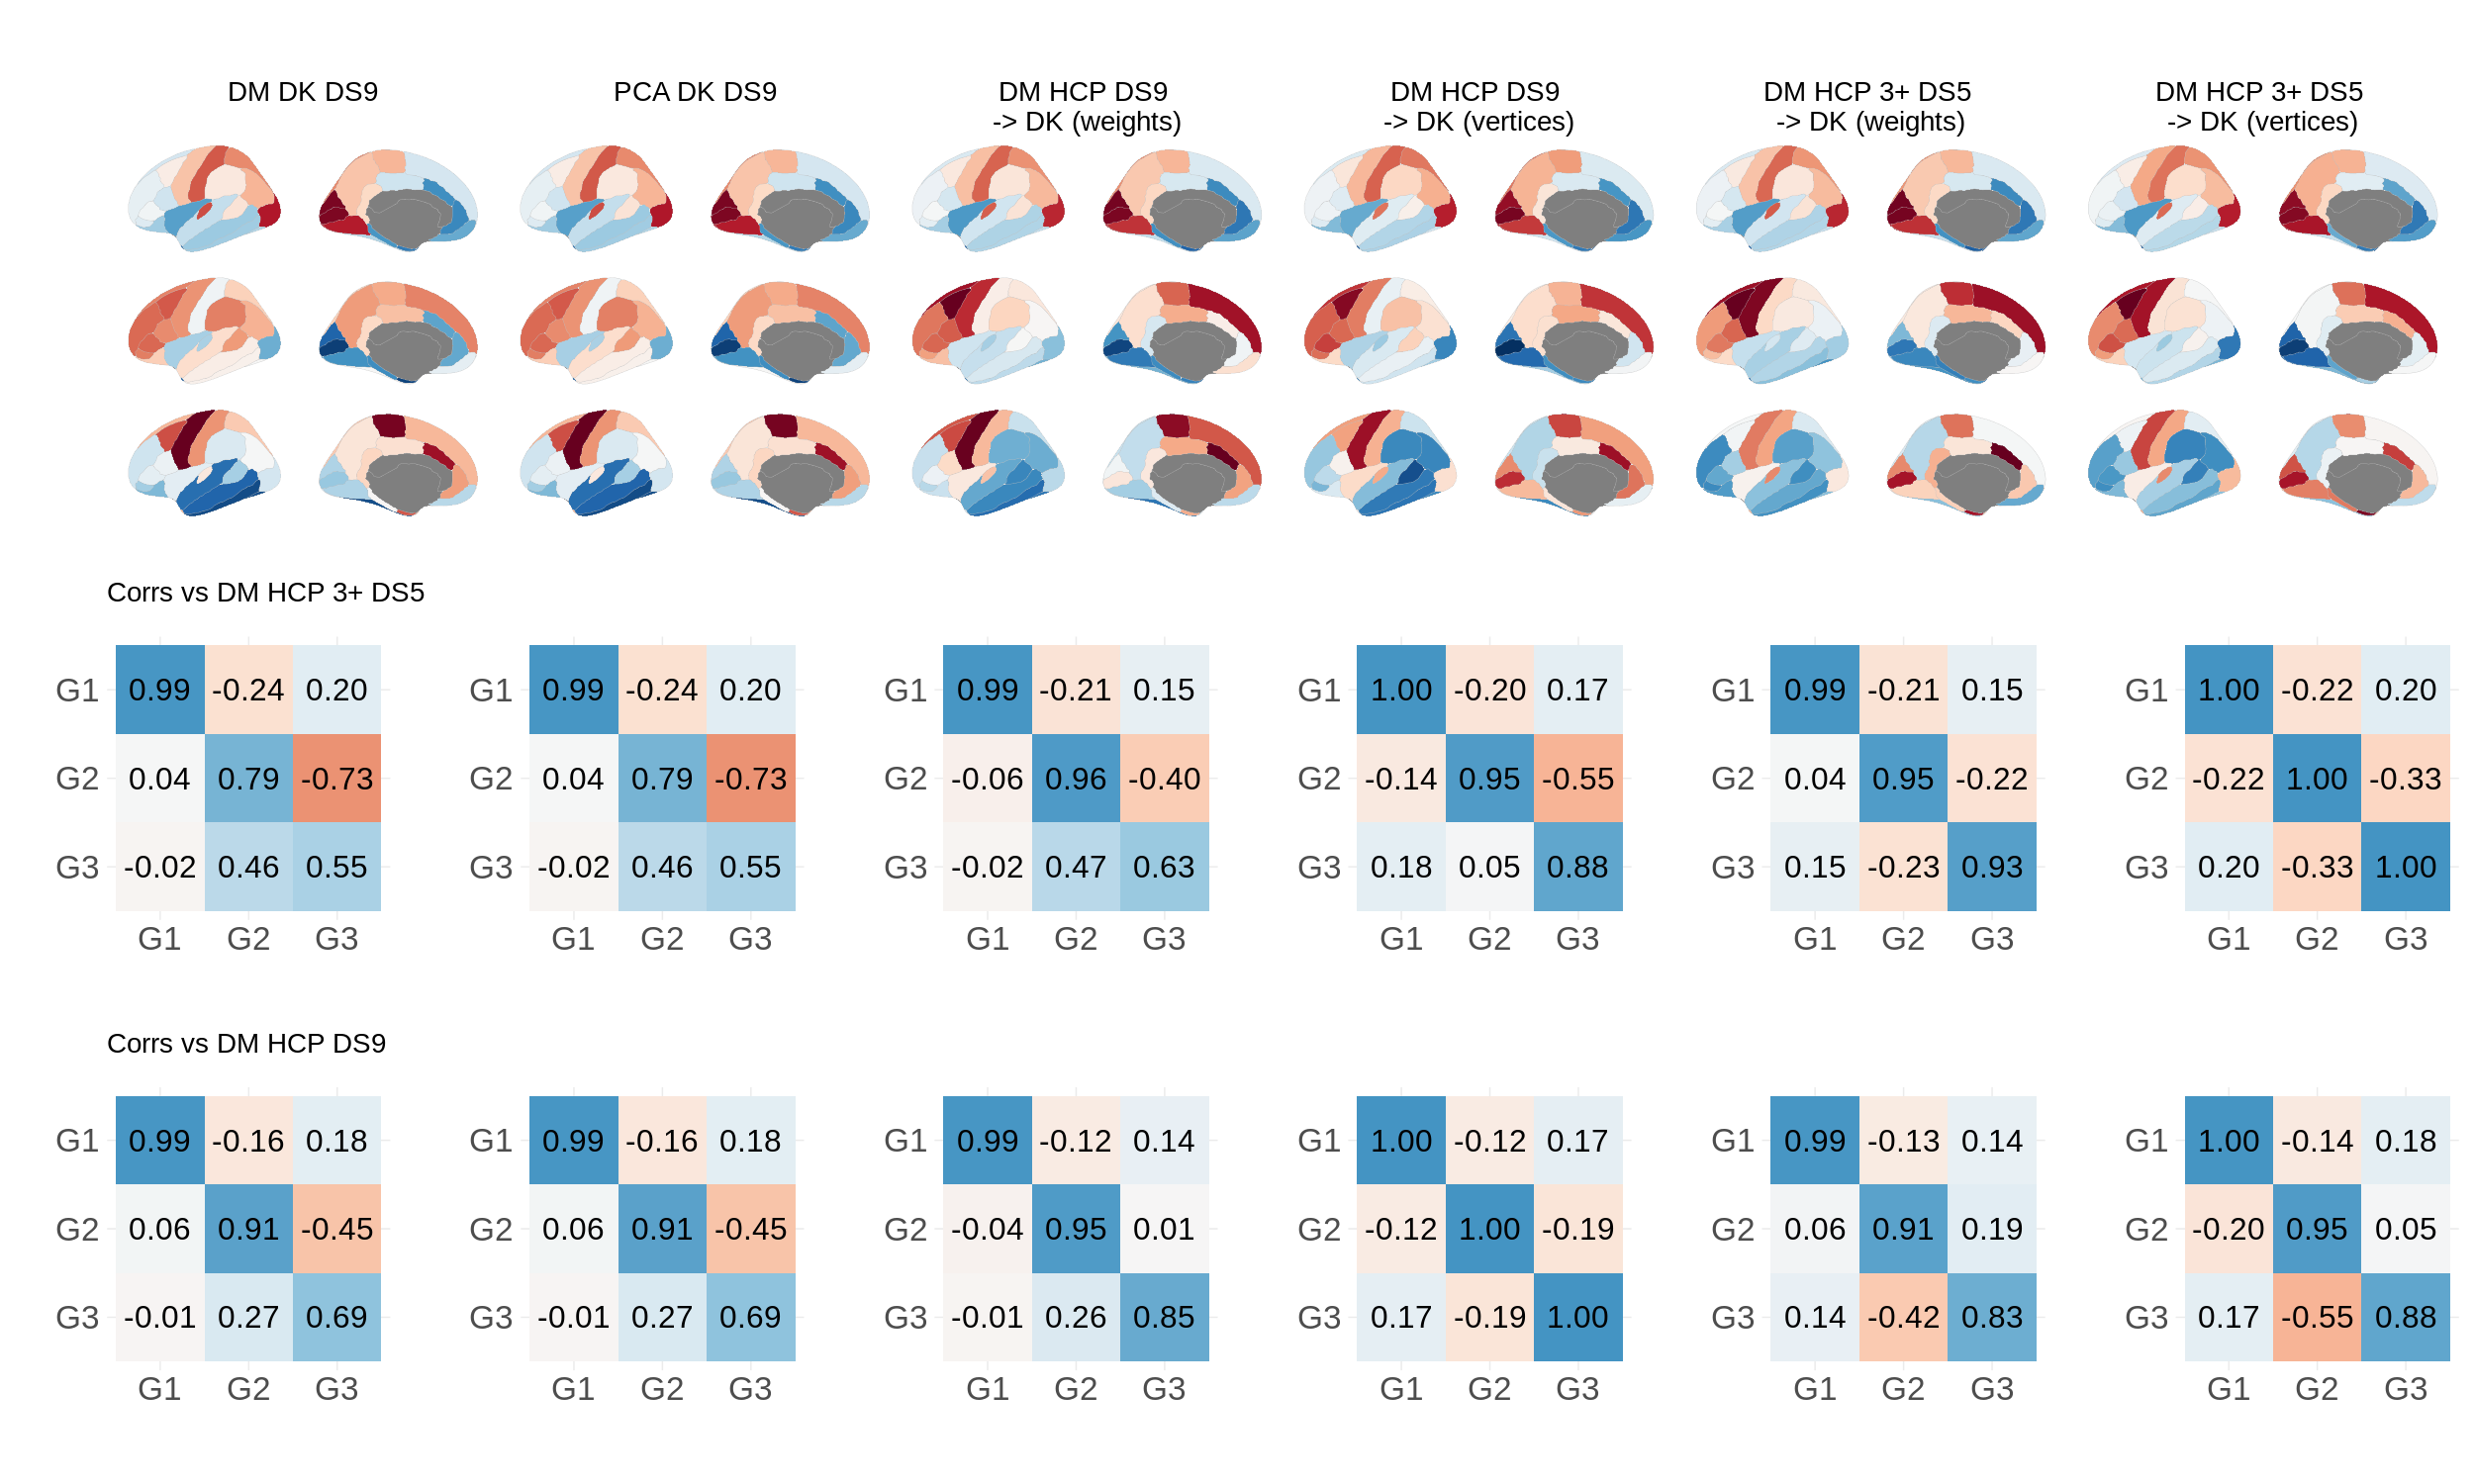

In [48]:
%%R -i dk_scores -i score_corrs -i score_corrs_2 -w 25 -h 15 --units in -r 100
source("../code/Rplots.R")
g1 <- plot_dk(dk_scores) + theme(strip.text.x=element_text(size=20), strip.text.y=element_blank()) + guides(fill='none')
g2 <- plot_corrs(score_corrs) + theme(strip.text.x=element_blank(), plot.title=element_text(size=20, hjust=0)) + guides(fill='none') + ggtitle('Corrs vs DM HCP 3+ DS5')
g3 <- plot_corrs(score_corrs_2) + theme(strip.text.x=element_blank(), plot.title=element_text(size=20, hjust=0)) + guides(fill='none') + ggtitle('Corrs vs DM HCP DS9')

(g1 / g2 / g3) + plot_layout(heights=c(3,2,2))

## Compare parcellations

In [3]:
dm_hcp_ds9 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_ds9')
dm_dk_ds9 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('dk_ds9')
# dm_dx_ds9 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('dx_ds9')

New gradients version: method=dm, kernel=normalized_angle, data=hcp_ds9
New gradients version: method=dm, kernel=normalized_angle, data=dk_ds9


In [17]:
dm_dk_ds9_sparse5 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1, sparsity=0.5).fit('dk_ds9')
dm_dk_ds9_gaussian = gradientVersion(approach='dm', kernel='gaussian', alpha=1, sparsity=0).fit('dk_ds9')

New gradients version: method=dm, kernel=normalized_angle, sparsity=0.5, data=dk_ds9
New gradients version: method=dm, kernel=gaussian, sparsity=0, data=dk_ds9


In [22]:
dm_dk_ds8 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('dk_ds8')
pca_dk_ds8 = gradientVersion(approach='pca').fit('dk_ds8')

New gradients version: method=dm, kernel=normalized_angle, sparsity=0, data=dk_ds8
New gradients version: method=pca, kernel=None, sparsity=0, data=dk_ds8


In [8]:
pca_dk_ds9 = gradientVersion(approach='pca').fit('dk_ds9')
dm_dk_ds5 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('dk_ds5')
dm_hcp_3d_ds5 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_3donors_ds5')


New gradients version: method=pca, kernel=None, sparsity=0, data=dk_ds9
New gradients version: method=dm, kernel=normalized_angle, sparsity=0, data=dk_ds5
New gradients version: method=dm, kernel=normalized_angle, sparsity=0, data=hcp_3donors_ds5


In [23]:
dk_scores = {
    'DM DK DS9': dm_dk_ds9.clean_scores(),
    'PCA DK DS9': pca_dk_ds9.clean_scores(),
    'DM DK DS8': dm_dk_ds8.clean_scores(),
    'PCA DK DS8': pca_dk_ds8.clean_scores(),
    # 'DM DK DS9 S5': dm_dk_ds9_sparse5.clean_scores(),
    # 'DM DK DS9 G': dm_dk_ds9_gaussian.clean_scores(),
    'DM HCP DS9 -> DK': dm_dk_ds9.score_from(dm_hcp_ds9),
    'DM HCP 3+ DS5 -> DK': dm_dk_ds9.score_from(dm_hcp_3d_ds5),
}

dk_scores = (pd.concat(dk_scores)
             .reset_index(0)
             .rename({'level_0':'version'}, axis=1)
            )

In [24]:
corrs_dict = {
    'DM DK DS9 v self': correlate(dm_dk_ds9.scores, dm_dk_ds9.scores),
    'DM DK DS9 v PCA DK DS9': correlate(dm_dk_ds9.scores, pca_dk_ds9.scores),
    'DM DK DS9 v DM DK DS8': correlate(dm_dk_ds9.scores, dm_dk_ds8.scores),
    'DM DK DS9 v PCA DK DS8': correlate(dm_dk_ds9.scores, pca_dk_ds8.scores),
    # 'DM DK DS9 v DM DK DS9 S5': correlate(dm_dk_ds9.scores, dm_dk_ds9_sparse5.scores),
    # 'DM DK DS9 v DM DK DS9 G': correlate(dm_dk_ds9.scores, dm_dk_ds9_gaussian.scores),
    'DM DK DS9 v DM HCP DS9': correlate(dm_dk_ds9.scores, dm_dk_ds9.score_from(dm_hcp_ds9, clean=False)),
    'DM DK DS9 v DM HCP 3+ DS5': correlate(dm_dk_ds9.scores, dm_dk_ds9.score_from(dm_hcp_3d_ds5, clean=False)),
}

score_corrs_1 = (pd.concat(corrs_dict)
 .melt(ignore_index=False)
 .reset_index()
 .set_axis(['version','x','y','corr'], axis=1)
 # .loc[lambda x: (x['x'] < 3) & (x['y'] < 3)]
 # .replace({'x':{0:'G1',1:'G2',2:'G3'}, 'y':{0:'G1',1:'G2',2:'G3'}})
)

In [25]:
hcp_ds5_in_dk = dm_dk_ds9.score_from(dm_hcp_3d_ds5, clean=False)
corrs_dict = {
    'DM HCP 3+ DS5 v DM DK DS9': correlate(hcp_ds5_in_dk, dm_dk_ds9.scores),
    'DM HCP 3+ DS5 v PCA DK DS9': correlate(hcp_ds5_in_dk, pca_dk_ds9.scores),
    'DM HCP 3+ DS5 v DM DK DS8': correlate(hcp_ds5_in_dk, dm_dk_ds8.scores),
    'DM HCP 3+ DS5 v PCA DK DS8': correlate(hcp_ds5_in_dk, pca_dk_ds8.scores),
    # 'DM HCP 3+ DS5 v DM DK DS9 S5': correlate(hcp_ds5_in_dk, dm_dk_ds9_sparse5.scores),
    # 'DM HCP 3+ DS5 v DM DK DS9 G': correlate(hcp_ds5_in_dk, dm_dk_ds9_gaussian.scores),
    'DM HCP 3+ DS5 v DM HCP DS9': correlate(hcp_ds5_in_dk, dm_dk_ds9.score_from(dm_hcp_ds9, clean=False)),
    'DM HCP 3+ DS5 v self': correlate(hcp_ds5_in_dk, dm_dk_ds9.score_from(dm_hcp_3d_ds5, clean=False)),
}

score_corrs_2 = (pd.concat(corrs_dict)
 .melt(ignore_index=False)
 .reset_index()
 .set_axis(['version','x','y','corr'], axis=1)
 # .loc[lambda x: (x['x'] < 3) & (x['y'] < 3)]
 # .replace({'x':{0:'G1',1:'G2',2:'G3'}, 'y':{0:'G1',1:'G2',2:'G3'}})
)

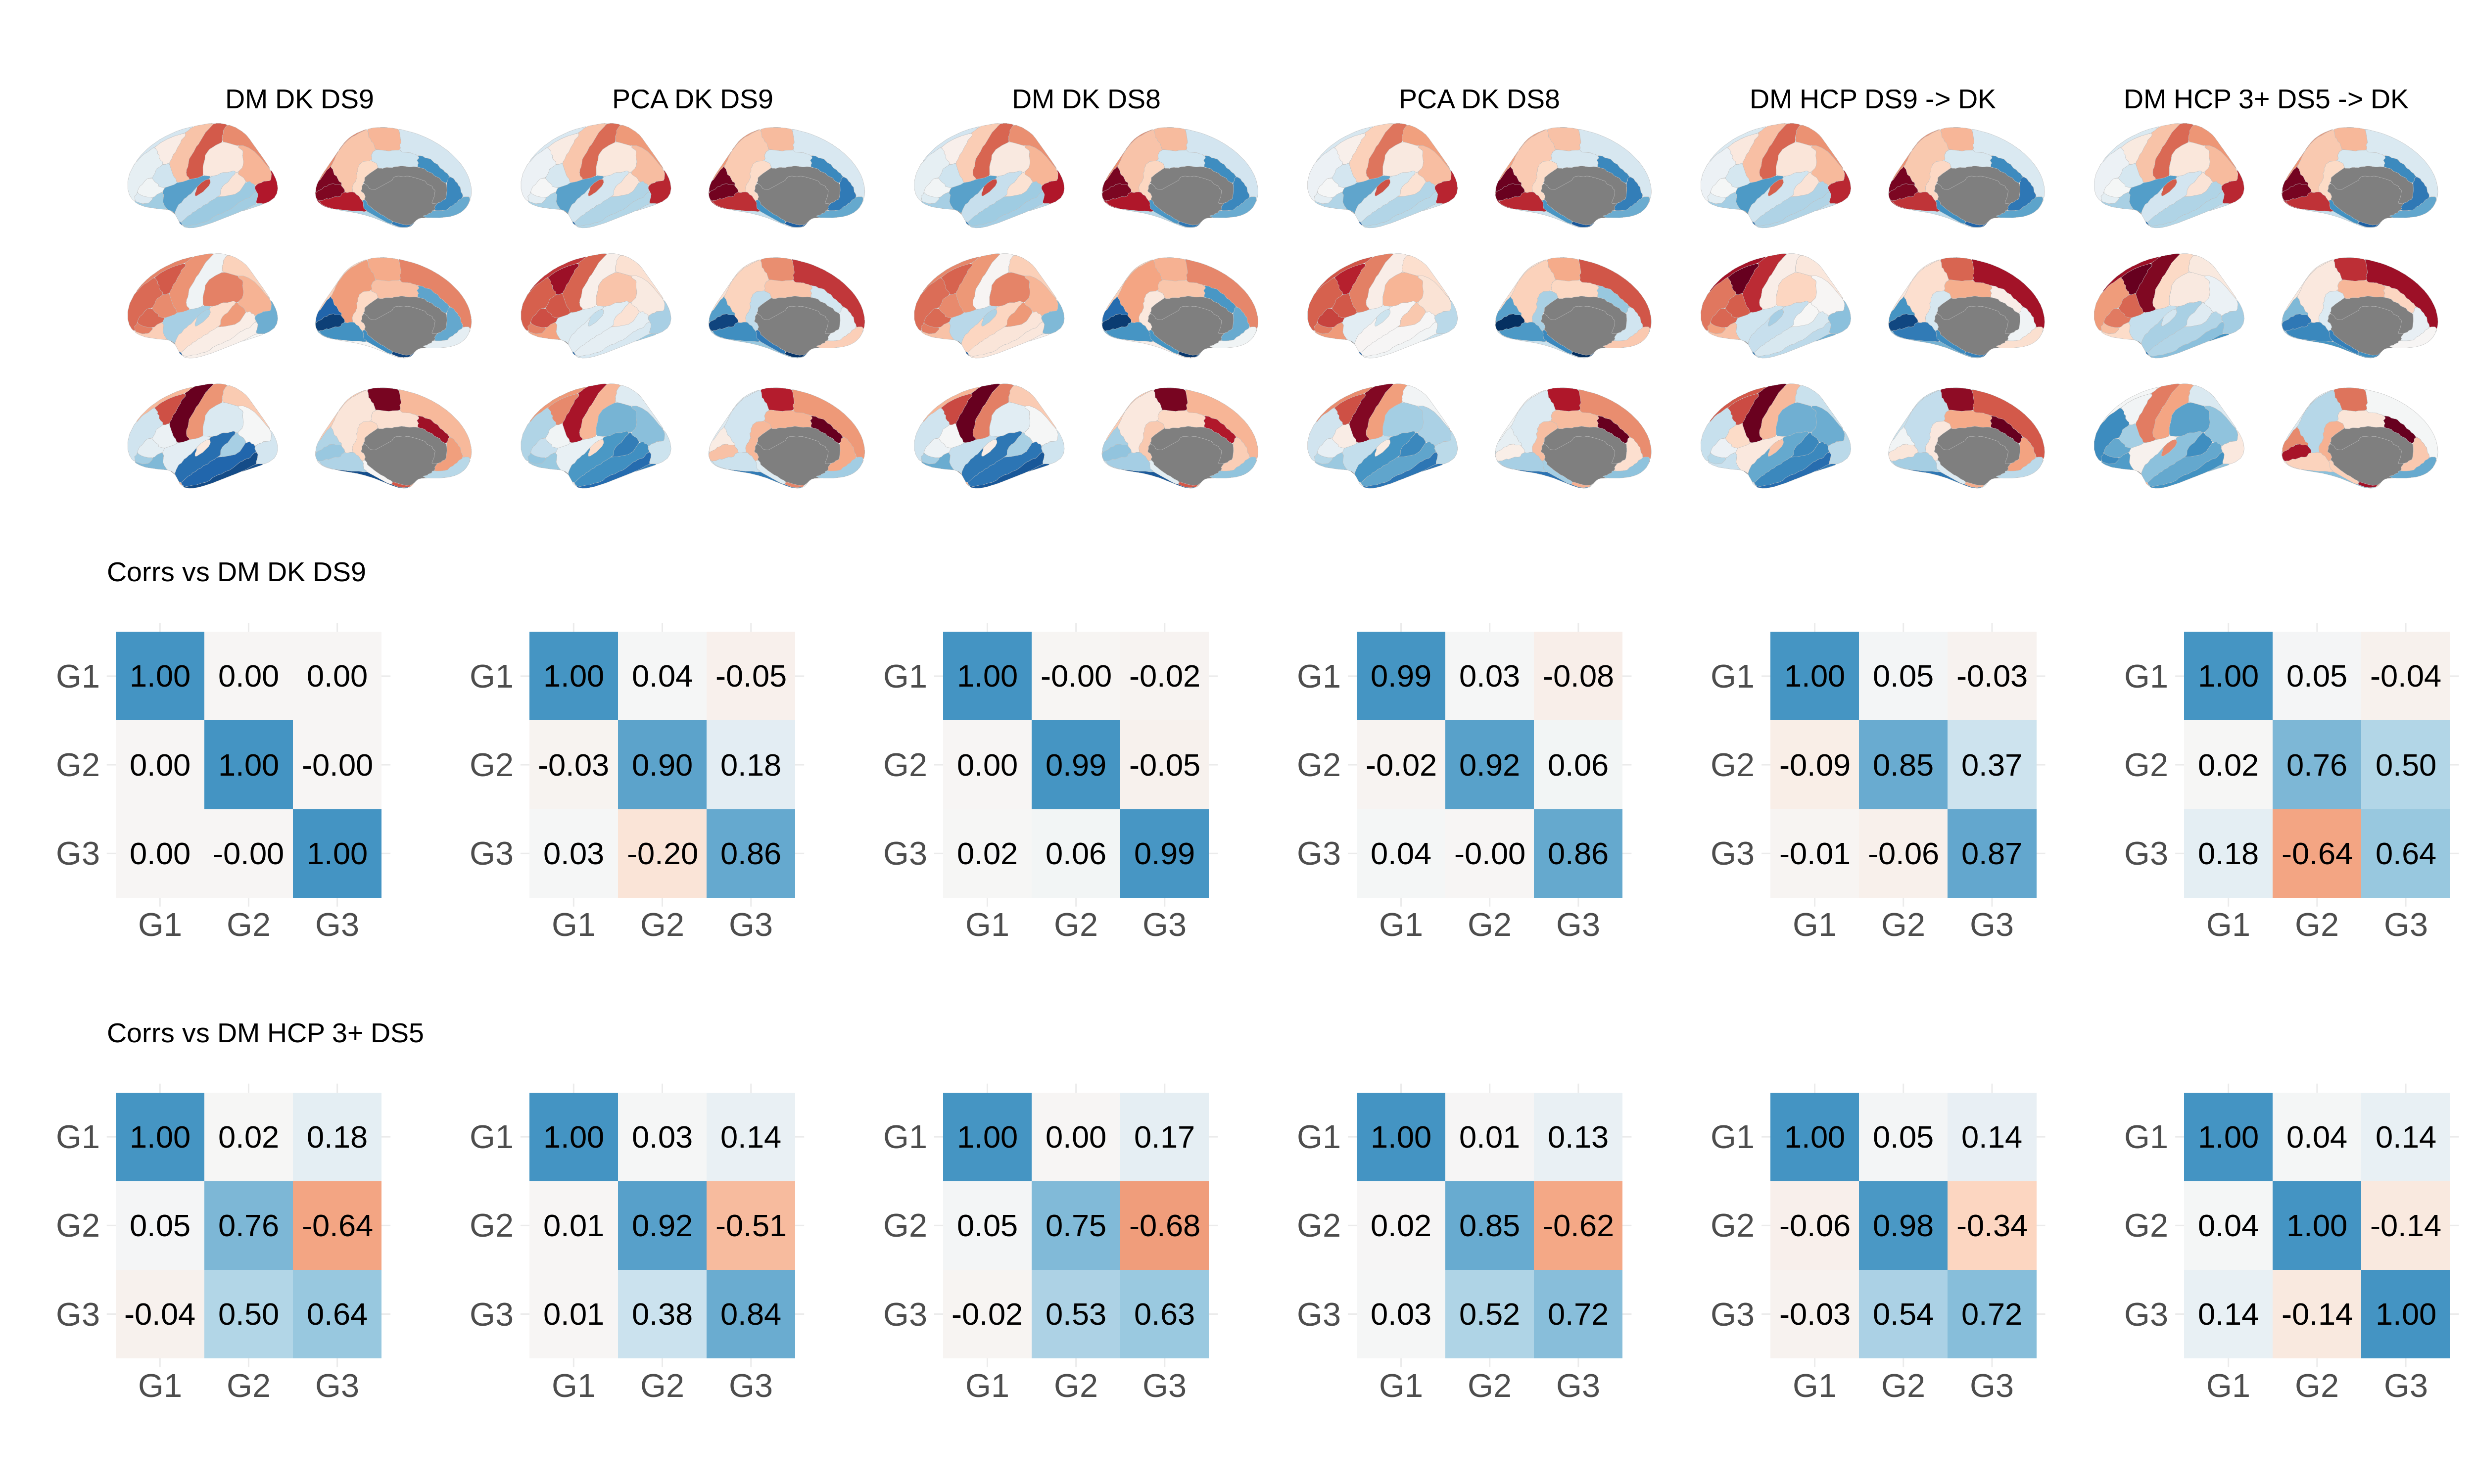

In [26]:
%%R -i dk_scores -i score_corrs_1 -i score_corrs_2 -w 25 -h 15 --units in -r 200
g1 <- plot_dk(dk_scores) + theme(strip.text.x=element_text(size=20), strip.text.y=element_blank()) + guides(fill='none')
g2 <- plot_corrs(score_corrs_1) + theme(strip.text.x=element_blank(), plot.title=element_text(size=20, hjust=0)) + guides(fill='none') + ggtitle('Corrs vs DM DK DS9')
g3 <- plot_corrs(score_corrs_2) + theme(strip.text.x=element_blank(), plot.title=element_text(size=20, hjust=0)) + guides(fill='none') + ggtitle('Corrs vs DM HCP 3+ DS5')

(g1 / g2 / g3) + plot_layout(heights=c(3,2,2))

In [83]:
dm_dk_ds9_from_hcp = dm_dk_ds9
dm_dk_ds9_from_hcp.scores = dm_dk_ds9.score_from(dm_hcp_3d_ds5, clean=False, flips=[1])

In [85]:
correlate(dm_dk_ds9_from_hcp.fit_weights(), dm_hcp_3d_ds5.weights)

,0,1,2,3,4
0,0.994767,0.036919,0.014844,0.238607,-0.177124
1,0.153845,0.951279,-0.029447,0.119255,-0.179777
2,0.414598,-0.069309,0.856674,-0.063517,-0.125841
3,0.969904,0.096465,-0.062758,0.385816,-0.221593
4,0.962252,0.208250,0.016110,0.303003,-0.310590


## Plot multiple parcellations

In [198]:
hcp_scores = dm_hcp_ds8.clean_scores().assign(version='HCP-MMP1.0')
dk_scores = dm_dk_ds8.clean_scores().assign(version='Desikan-Killiany')
dx_scores = dm_dx_ds8.clean_scores().assign(version='Desterieux')
s400_scores = (dm_s400_ds8.scores
             .apply(lambda x: (x-np.mean(x))/np.std(x))
             .join(get_labels_schaefer(size=400))
             .assign(version='Schaefer-400')
            )

In [177]:
# weights_version = dm_hcp_3d_ds5
# weights_version.fit_weights(normalize=False);
# weights_version = dm_hcp_ds8
# weights_version.fit_weights()
# weights_version.fit_weights(dm_hcp_3d_ds5.expression)

In [181]:
corrs_dict = {
    'HCP-MMP1.0': correlate(dm_hcp_ds8.fit_weights(overwrite=False), weights_version.weights),
    'Desikan-Killiany': correlate(dm_dk_ds8.fit_weights(), weights_version.weights),
    'Desterieux': correlate(dm_dx_ds8.fit_weights(), weights_version.weights),    
    'Schaefer-400': correlate(dm_s400_ds8.fit_weights(), weights_version.weights)

}

weight_corrs = (pd.concat(corrs_dict)
 .melt(ignore_index=False)
 .reset_index()
 .set_axis(['version','x','y','corr'], axis=1)
 .loc[lambda x: (x['x'] < 3) & (x['y'] < 3)]
 .replace({'x':{0:'G1',1:'G2',2:'G3'}, 'y':{0:'G1',1:'G2',2:'G3'}})
)

In [163]:
def count_gene_overlap(v1, v2):
    overlap = set(v1.weights.index).intersection(set(v2.weights.index))
    overlap_v1 = round(len(overlap)/len(v1.weights.index),2)*100
    overlap_v2 = round(len(overlap)/len(v2.weights.index),2)*100
    print(f'Overlap is {overlap_v1}% of v1 genes, {overlap_v2}% of v2 genes')
    
count_gene_overlap(dm_hcp_ds8, dm_s400_ds8)

Overlap is 89.0% of v1 genes, 89.0% of v2 genes


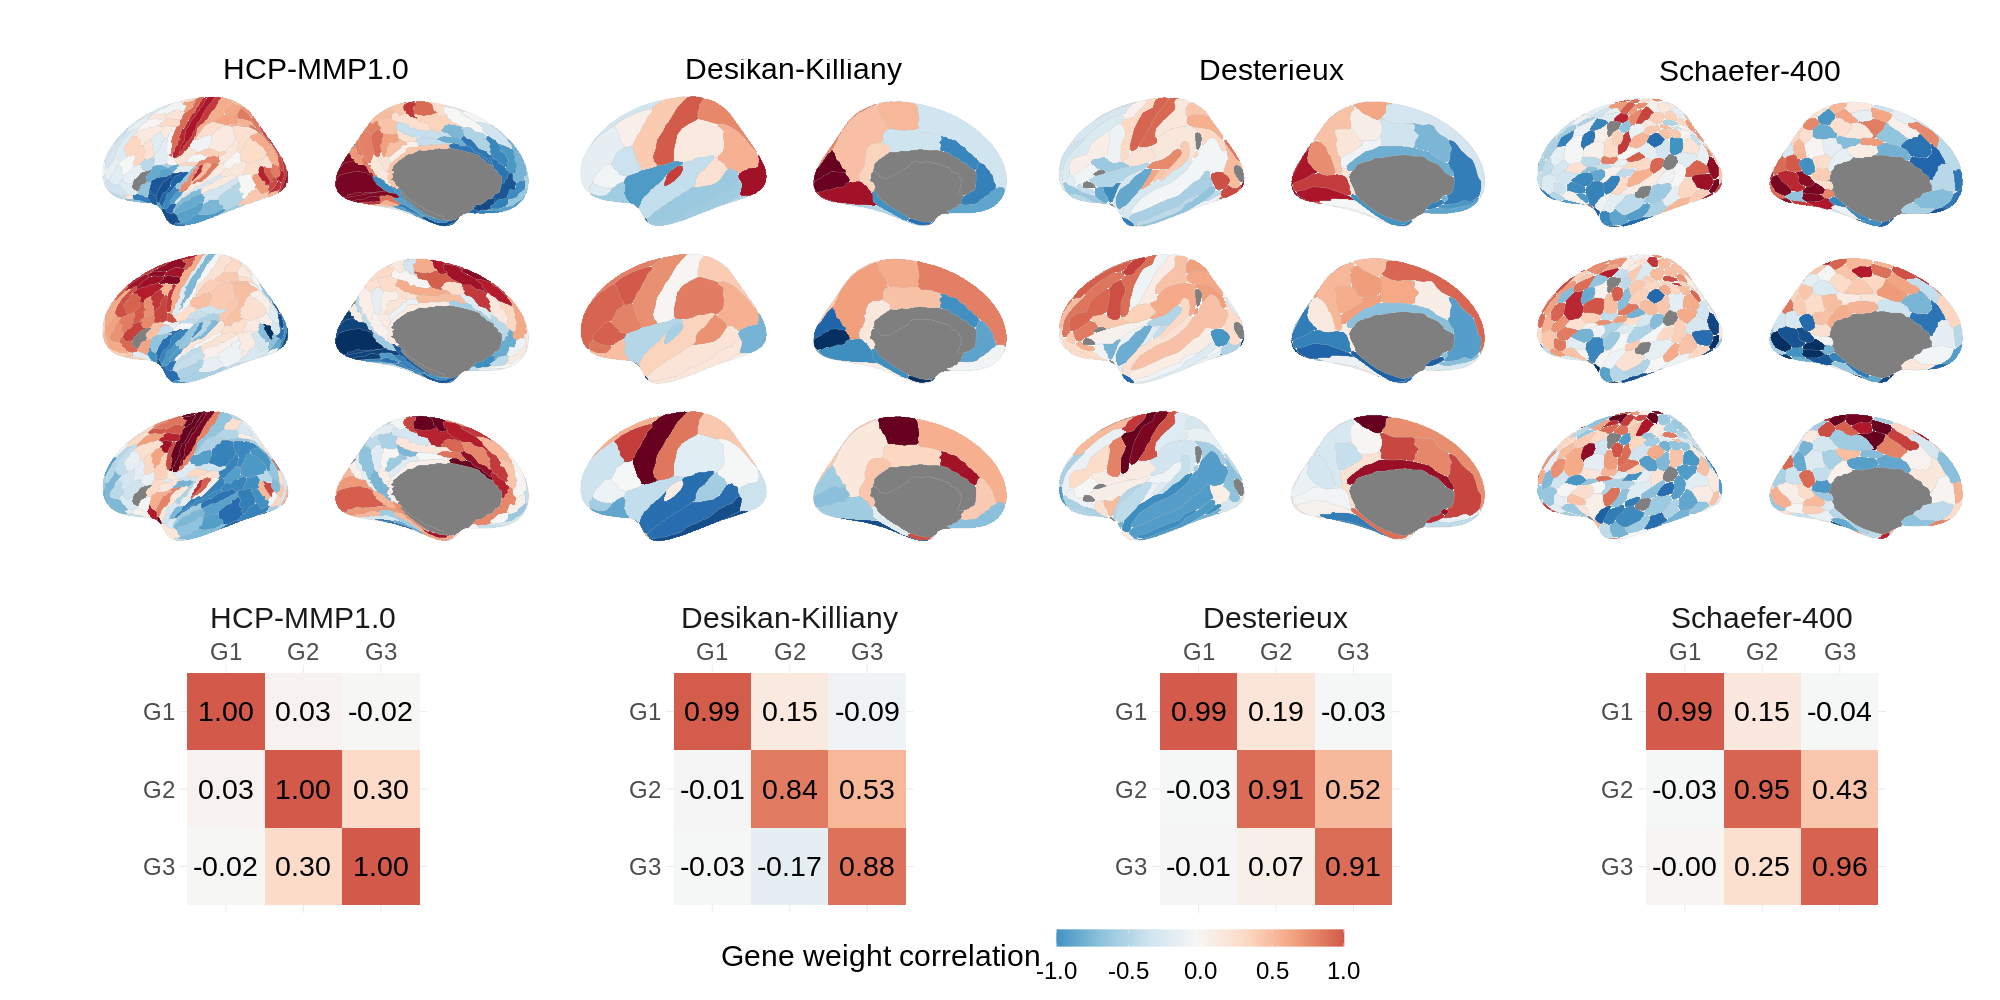

In [207]:
%%R -w 2000 -h 1000 -i hcp_scores -i dk_scores -i dx_scores -i s400_scores -i weight_corrs 
source("../code/Rplots.R")
source("../code/brainPlots.R")

g1a <- plot_hcp(hcp_scores)
g1b <- plot_dk(dk_scores) + plot_layout(tag_level='new')
g1c <- plot_dx(dx_scores) + plot_layout(tag_level='new')
g1d <- plot_schaefer(s400_scores, size=400) + plot_layout(tag_level='new')

g2 <- plot_weight_corrs(weight_corrs, spacing=14, ylab='HCP-MMP1.0')


plot <- (
    ((g1a | g1b | g1c | g1d) & theme(legend.position='none', strip.text.y=element_blank())) /
    g2
) + plot_layout(heights=c(2,1))


themed <- plot & theme(
    text=element_text(size=30), 
    strip.text.x = element_text(size=30)
)
themed

---

Try other atlases from https://github.com/neurodata/neuroparc/tree/master/atlases/label/Human

# Schaefer

In [121]:
%%R
# Save labels
library(ggsegSchaefer)
schaefer_left <- schaefer17_800$data %>% filter(hemi=='left')
data.frame(id=schaefer_left$roi, label=schaefer_left$label) %>% 
mutate(id=as.numeric(id)) %>% 
write_csv("../data/parcellations/schaefer800_ggseg_labels.csv")

In [140]:
get_expression_abagen(fetch_schaefer(size=800), DS_threshold=0.8, donors_threshold=1, save_name='s800_ds8', verbose=1)

INFO: Group-level atlas provided; using MNI coords for tissue samples
INFO: Reannotating probes with information from Arnatkevic̆iūtė et al., 2019, NeuroImage
INFO: Filtering probes with intensity-based threshold of 0.5
INFO: 32670 probes survive intensity-based filtering
INFO: Reducing probes indexing same gene with method: diff_stability
INFO: 15947 genes remain after probe filtering + selection
INFO: 448 / 475 samples matched to regions for donor #9861
INFO: 360 / 369 samples matched to regions for donor #10021
INFO: 174 / 182 samples matched to regions for donor #12876
INFO: 241 / 262 samples matched to regions for donor #14380
INFO: 223 / 223 samples matched to regions for donor #15496
INFO: 237 / 239 samples matched to regions for donor #15697
INFO: 401 / 400 regions have >=0 total samples
INFO: 363 / 400 regions have samples from >=1 donors
INFO: Aggregating samples to regions with provided region_agg: donors


3190 genes remain after filtering for top 0.2 differential stability


gene_symbol,A1BG,ABCA6,ABCA9,ABCC12,ABCC8,ABCG4,ABCG5,ABHD12,ABHD12B,ABHD17A,...,ZNF831,ZNF883,ZNRF1,ZRANB3,ZSCAN18,ZSCAN29,ZSCAN9,ZSWIM4,ZYX,ZZEF1
label,,,,,,,,,,,,,,,,,,,,,
2,0.198204,0.863439,0.891514,0.297852,0.917553,0.589566,0.298587,0.502717,0.089953,0.873909,...,0.095679,0.166179,0.307432,0.158091,0.108499,0.643524,0.745256,0.939186,0.831410,0.803091
3,0.140109,0.755321,0.858639,0.149852,0.922944,0.891431,0.524599,0.755260,0.105759,0.678805,...,0.122381,0.563453,0.244279,0.176955,0.165889,0.659133,0.909419,0.695742,0.961274,0.656698
4,0.529563,0.663202,0.632222,0.440689,0.390526,0.648434,0.260219,0.559240,0.394898,0.337964,...,0.485841,0.287250,0.397645,0.482892,0.512235,0.470140,0.427885,0.421394,0.462312,0.620550
5,0.480543,0.566778,0.533526,0.553019,0.538441,0.504147,0.402713,0.449394,0.367525,0.535612,...,0.520644,0.514844,0.537013,0.499572,0.525354,0.542570,0.534626,0.497596,0.586529,0.585893
6,0.472154,0.624441,0.555747,0.442045,0.625127,0.458726,0.234372,0.494388,0.328386,0.632064,...,0.277044,0.191433,0.204030,0.252727,0.278332,0.506996,0.723745,0.644782,0.720799,0.424050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0.546283,0.493223,0.559266,0.485708,0.612204,0.557469,0.356146,0.394909,0.465632,0.569273,...,0.514846,0.664807,0.586013,0.441809,0.576045,0.689403,0.601895,0.369097,0.492099,0.685222
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,0.510850,0.355154,0.514290,0.592179,0.606804,0.551976,0.295600,0.377151,0.554965,0.657167,...,0.509441,0.493931,0.512320,0.488622,0.551863,0.430643,0.424277,0.482080,0.663626,0.517778


In [166]:
dm_s400_ds8 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('s400_ds8')

New gradients version: method=dm, params={'alpha': 1}, kernel=normalized_angle, sparsity=0, data=s400_ds8


In [168]:
s400_scores = (dm_s400_ds8.scores
             .apply(lambda x: (x-np.mean(x))/np.std(x))
             .join(get_labels_schaefer(size=400))
               .assign(version='Schaefer400')
            )

In [191]:
s400_scores

,G1,G2,G3,label,version
id,,,,,
1,0.176658,-0.089120,-1.380524,V1,Schaefer-400
2,1.391640,-1.022116,-0.417289,MST,Schaefer-400
3,1.540304,-1.067630,-0.477950,V6,Schaefer-400
4,1.889965,-1.954522,0.130287,V2,Schaefer-400
5,1.933358,-2.056702,0.325228,V3,Schaefer-400
...,...,...,...,...,...
196,-0.217222,-0.082806,-1.515085,V7,Schaefer-400
197,0.171287,0.565028,-1.521464,IPS1,Schaefer-400
198,0.192511,-0.039782,-0.915711,FFC,Schaefer-400


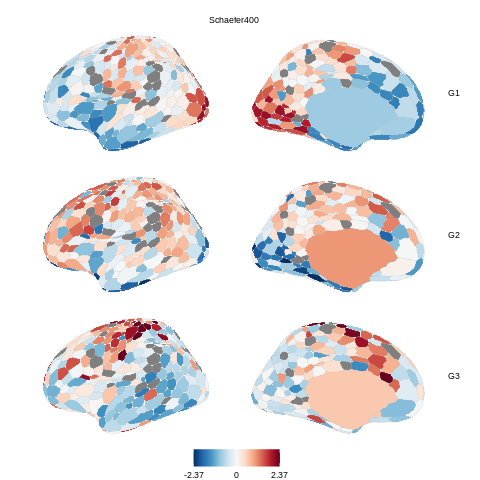

In [143]:
%%R -i s800_scores
source("../code/brainPlots.R")
plot_schaefer(s800_scores, three=T, size=800)

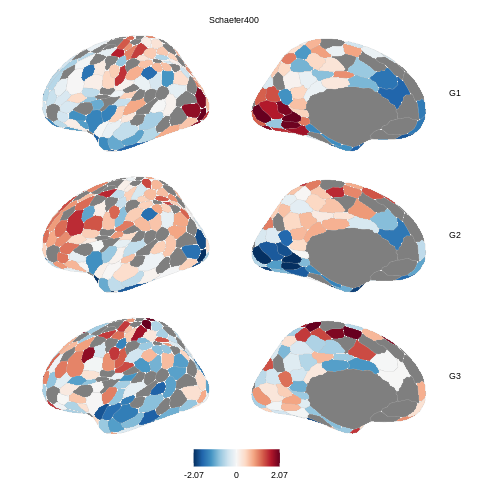

In [89]:
%%R -i s400_scores
source("../code/brainPlots.R")
plot_schaefer(s400_scores, three=T, size=400)

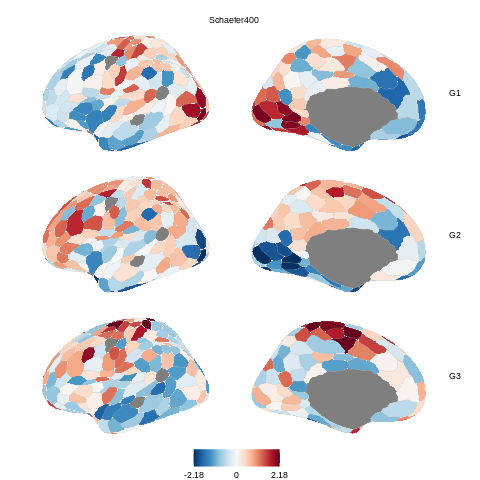

In [82]:
%%R -i s400_scores
source("../code/brainPlots.R")
plot_schaefer(s400_scores, three=T, size=400)

In [99]:
dm_s200_ds8.corr_weights(dm_hcp_ds8)

,0,1,2,3,4
0,0.995764,-0.003561,-0.003121,0.142639,0.170078
1,0.074270,0.957068,0.431094,-0.077892,0.070122
2,0.002808,0.306123,0.955143,-0.214583,0.064260
3,0.181188,0.217051,-0.127695,0.770458,0.278675
4,-0.226571,0.034915,0.122306,0.434799,-0.480099


In [93]:
dm_s400_ds8.corr_weights(dm_hcp_ds8)

,0,1,2,3,4
0,0.994037,-0.026733,-0.004617,0.151537,0.176913
1,0.151544,0.950424,0.245643,-0.076597,0.104511
2,-0.036235,0.430878,0.961241,-0.202070,0.003077
3,0.150923,0.217344,-0.059876,0.789466,0.131267
4,0.115807,0.151977,-0.140166,-0.231628,0.641075


In [92]:
dm_s400_3d_ds8.corr_weights(dm_hcp_ds8)

,0,1,2,3,4
0,0.993198,-0.034325,-0.018648,0.164127,0.166788
1,0.155963,0.946580,0.202797,-0.018026,0.113435
2,-0.009163,0.468109,0.965282,-0.140898,-0.031346
3,0.203723,0.225562,-0.195040,0.772291,0.266701
4,0.148019,0.099378,-0.090749,-0.356658,0.745044


In [98]:
dm_dk_ds8.corr_weights(dm_hcp_ds8)

,0,1,2,3,4
0,0.990599,-0.011851,-0.026879,0.213384,0.197481
1,0.147077,0.840151,-0.167754,0.130097,0.289453
2,-0.085137,0.525653,0.883573,-0.279833,-0.191965
3,0.093579,0.338500,0.277591,0.690158,-0.063919
4,-0.008354,0.290791,0.284807,-0.000437,0.412097


# Destrieux atlas

In [108]:
(pd.read_csv("../data/parcellations/Destrieux.csv")
        .set_axis(['id','label'],axis=1)
        .assign(structure='cortex', hemisphere='L'))

,id,label,structure,hemisphere
0,1,Fronto-marginal_gyrus+sulcus,cortex,L
1,2,Inferior_occipital_gyrus+sulcus,cortex,L
2,3,Paracentral_lobule+sulcus,cortex,L
3,4,Subcentral_gyrus+sulci,cortex,L
4,5,Transverse_frontopolar_gyri+sulci,cortex,L
...,...,...,...,...
70,71,Suborbital_sulcus,cortex,L
71,72,Subparietal_sulcus,cortex,L
72,73,Inferior_temporal_sulcus,cortex,L
73,74,Superior_temporal_sulcus,cortex,L


In [110]:
get_expression_abagen(fetch_dx(), DS_threshold=0.8, save_name='dx_ds8')

3190 genes remain after filtering for top 0.2 differential stability


gene_symbol,A1BG,ABCA6,ABCA9,ABCC1,ABCC12,ABCC6,ABCC8,ABCG4,ABCG5,ABHD12B,...,ZNF883,ZNRF1,ZRANB3,ZSCAN18,ZSCAN29,ZSCAN5A,ZSCAN9,ZSWIM4,ZSWIM9,ZYX
label,,,,,,,,,,,,,,,,,,,,,
1,0.669975,0.436774,0.573147,0.450618,0.801956,0.378882,0.619475,0.312360,0.742532,0.609773,...,0.581373,0.714901,0.493594,0.543708,0.720747,0.514735,0.515857,0.511258,0.402495,0.418160
2,0.399734,0.739016,0.648189,0.617915,0.510332,0.256638,0.745086,0.602295,0.244029,0.299685,...,0.431883,0.301789,0.323627,0.339279,0.699759,0.294092,0.726017,0.590012,0.331928,0.730661
3,0.300167,0.584695,0.686769,0.521918,0.365391,0.579115,0.525424,0.766994,0.538096,0.671267,...,0.404114,0.246307,0.433002,0.274375,0.393944,0.525483,0.450076,0.474992,0.523323,0.653194
4,0.523203,0.555421,0.415646,0.383116,0.461244,0.339570,0.563779,0.438520,0.638232,0.593747,...,0.603605,0.387287,0.559806,0.474651,0.573820,0.428541,0.501021,0.503459,0.534612,0.548913
5,0.466865,0.417122,0.427364,0.514729,0.538383,0.406056,0.498223,0.470159,0.755218,0.590638,...,0.326799,0.592606,0.634786,0.642334,0.707927,0.485329,0.550354,0.589928,0.698301,0.449921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.637139,0.231776,0.335334,0.390414,0.657225,0.732877,0.605328,0.549727,0.687728,0.771858,...,0.687191,0.702357,0.637941,0.869616,0.397432,0.550342,0.389754,0.447335,0.713742,0.314954
72,0.513538,0.500677,0.642919,0.528634,0.600568,0.511167,0.610342,0.633921,0.409916,0.593891,...,0.217353,0.363360,0.371887,0.454273,0.558256,0.434587,0.581330,0.582891,0.642806,0.599547
73,0.702828,0.410978,0.232456,0.402082,0.665374,0.412082,0.576326,0.274208,0.186300,0.442997,...,0.708985,0.725222,0.570993,0.593443,0.693127,0.558242,0.355882,0.596670,0.382432,0.491121


In [129]:
dm_dx_ds9 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('dx_ds9')

New gradients version: method=dm, kernel=normalized_angle, data=dx_ds9


In [148]:
dx_scores = (dm_dx_ds9.scores
             .apply(lambda x: (x-np.mean(x))/np.std(x))
             .join(get_labels_dx()).assign(version='Desterieux')
            )

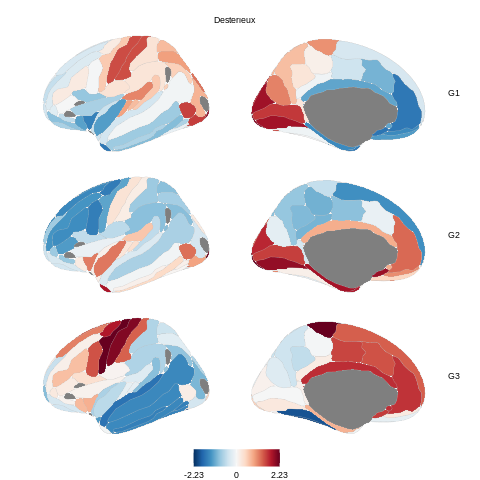

In [150]:
%%R -i dx_scores
plot_dx(dx_scores, three=T)

---

In [4]:
data_dir = "~/rds/rds-cam-psych-transc-Pb9UGUlrwWc/Cam_LIBD/AHBA_data/abagen-data/expression/"
hcp_base = pcaVersion(pd.read_csv(data_dir + 'hcp_base.csv', index_col=0))
hcp_3donors_ds8 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds8.csv', index_col=0))

New PCA version
New PCA version


In [19]:
dk_expression, stability = get_expression_abagen(atlas=fetch_dk(native=True), donors_threshold=0, DS_threshold=0, save_name='dk_native_base', return_stability=True)

In [21]:
stability.to_csv("../outputs/stability_dk.csv")

In [24]:
dk_base = pcaVersion(get_expression_abagen(atlas=fetch_dk(native=True), donors_threshold=0, DS_threshold=0, save_name='dk_base'))
dk_ds5 = pcaVersion(get_expression_abagen(atlas=fetch_dk(native=True), donors_threshold=0, DS_threshold=0.5, save_name='dk_ds5'))
dk_3donors_ds5 = pcaVersion(get_expression_abagen(atlas=fetch_dk(native=True), donors_threshold=3, DS_threshold=0.5, save_name='dk_3donors_ds5'))
dk_3donors_ds8 = pcaVersion(get_expression_abagen(atlas=fetch_dk(native=True), donors_threshold=3, DS_threshold=0.8, save_name='dk_3donors_ds8'))

New PCA version
7973 genes remain after filtering for top 0.5 differential stability
New PCA version
7973 genes remain after filtering for top 0.5 differential stability
New PCA version
3190 genes remain after filtering for top 0.2 differential stability
New PCA version


In [12]:
dk_ds4 = pcaVersion(get_expression_abagen(atlas=fetch_dk(native=True), donors_threshold=0, DS_threshold=0.4, save_name='dk_ds4'))
dk_ds3 = pcaVersion(get_expression_abagen(atlas=fetch_dk(native=True), donors_threshold=0, DS_threshold=0.3, save_name='dk_ds3'))
dk_ds2 = pcaVersion(get_expression_abagen(atlas=fetch_dk(native=True), donors_threshold=0, DS_threshold=0.2, save_name='dk_ds2'))

9568 genes remain after filtering for top 0.6 differential stability
New PCA version
11162 genes remain after filtering for top 0.7 differential stability
New PCA version
12757 genes remain after filtering for top 0.8 differential stability
New PCA version


In [5]:
dk_base = pcaVersion(pd.read_csv(data_dir + 'dk_base.csv', index_col=0))
dk_ds5 = pcaVersion(pd.read_csv(data_dir + 'dk_ds5.csv', index_col=0))
dk_3donors_ds5 = pcaVersion(pd.read_csv(data_dir + 'dk_3donors_ds5.csv', index_col=0))
dk_3donors_ds8 = pcaVersion(pd.read_csv(data_dir + 'dk_3donors_ds8.csv', index_col=0))

New PCA version
New PCA version
New PCA version
New PCA version


In [16]:
corrs_dict = {
    'DK 3-donors DS 0.8': hcp_3donors_ds8.corr_coefs(dk_3donors_ds8),
    'DK 3-donors DS 0.5': hcp_3donors_ds8.corr_coefs(dk_3donors_ds5),
    'DK DS 0.5': hcp_3donors_ds8.corr_coefs(dk_ds5),
    'DK DS 0.4': hcp_3donors_ds8.corr_coefs(dk_ds4),
    'DK DS 0.3': hcp_3donors_ds8.corr_coefs(dk_ds3),
    'DK DS 0.2': hcp_3donors_ds8.corr_coefs(dk_ds2),
    # 'HCP 3d 0.8 vs DK base': hcp_3donors_ds8.corr_coefs(dk_base),
}
df_corrs = (pd.concat(corrs_dict)
            .stack().reset_index()
            .set_axis(['version','x','y','corr'],axis=1)
           )

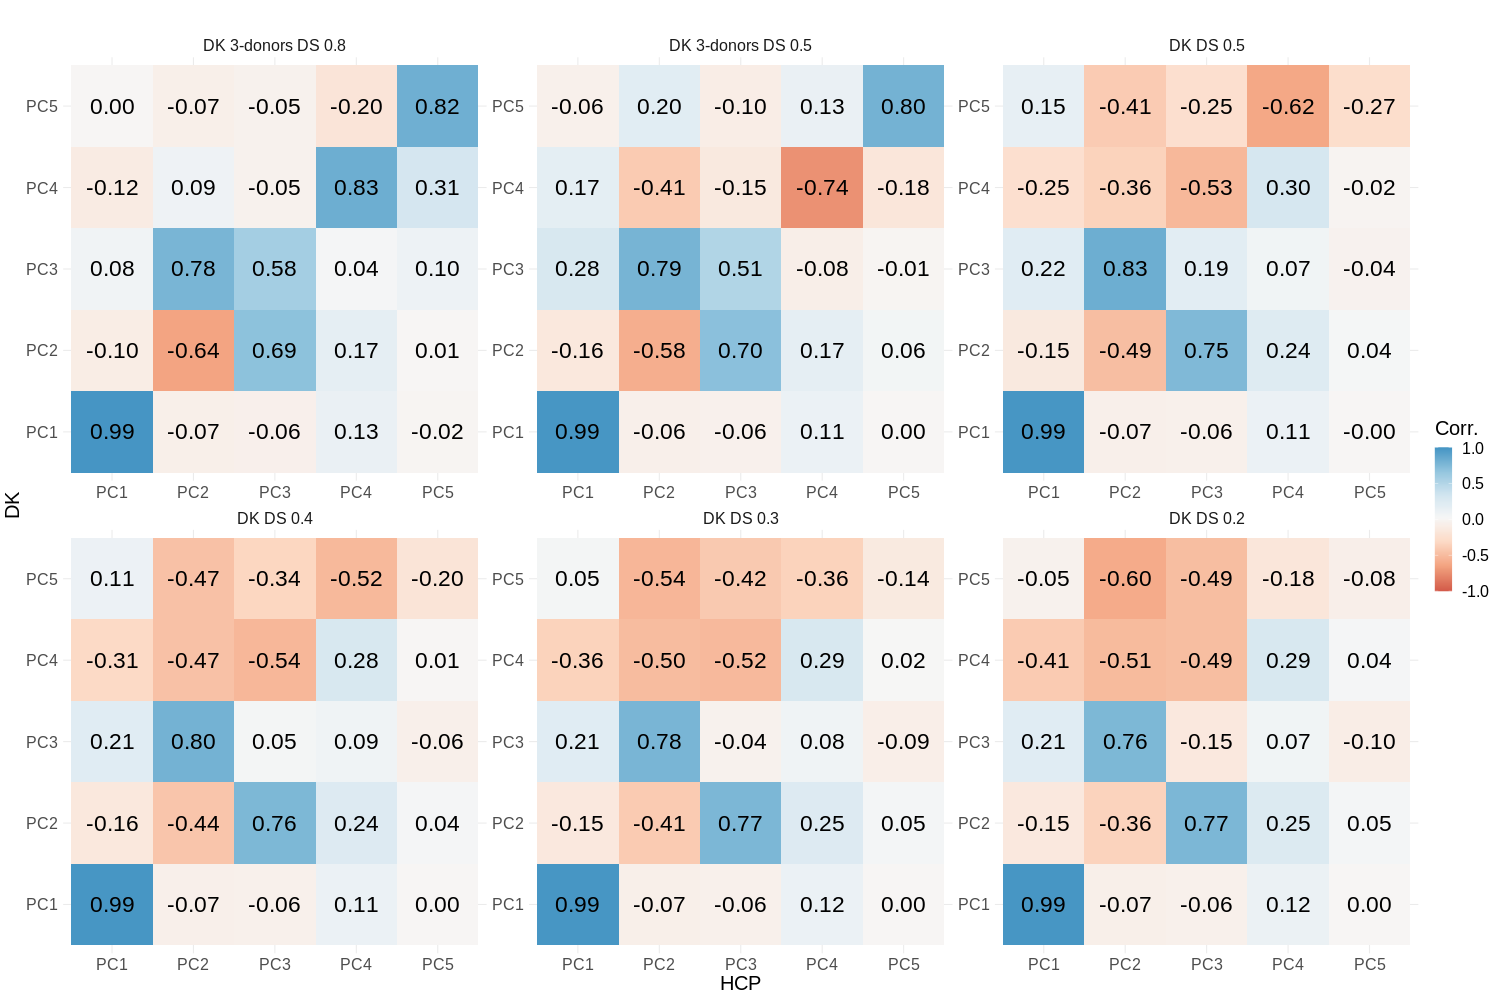

In [17]:
%%R -w 1500 -h 1000 -i df_corrs
plot_corrs(df_corrs, facetting='w') & theme(text=element_text(size=20))

In [9]:
corrs_dict = {
    'Base': hcp_native_base.corr_coefs(dk_native_base),
    '3D DS5': hcp_native_3donors_ds5.corr_coefs(dk_native_3donors_ds5),
    '3D DS8': hcp_native_3donors_ds8.corr_coefs(dk_native_3donors_ds8),
}
df_corrs = (pd.concat(corrs_dict)
            .stack().reset_index()
            .set_axis(['version','x','y','corr'],axis=1)
           )

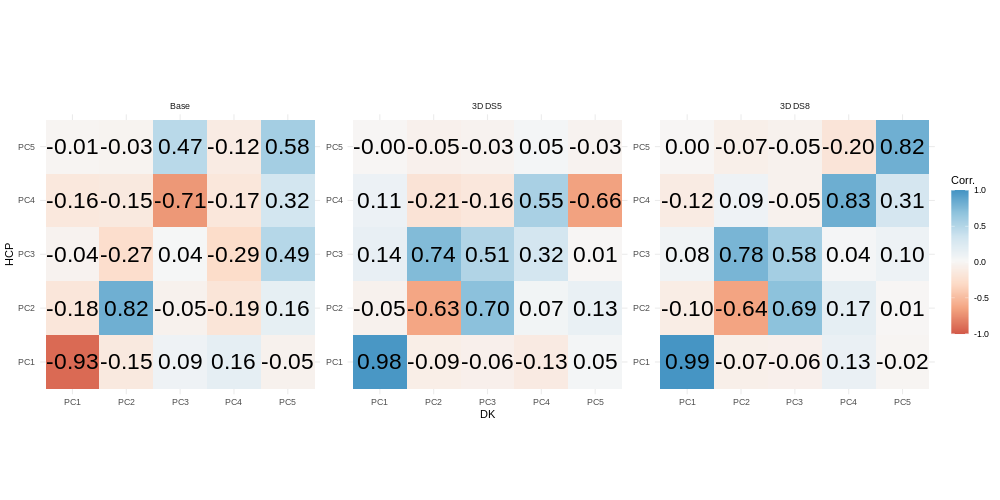

In [10]:
%%R -w 1000 -h 500 -i df_corrs
plot_corrs(df_corrs)